## IMPORTING THE DATA

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv') #Reads CSV file

In [3]:
df.sample(10) # UTF-8 Encoded using notepad // sample() is used to generate a sample random row or column from the function caller data frame.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3054,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...,NaN,NaN,NaN
1512,ham,"Hey sweet, I was wondering when you had a mome...",NaN,NaN,NaN
1627,spam,You have been selected to stay in 1 of 250 top...,NaN,NaN,NaN
3105,ham,I had been hoping i would not have to send you...,NaN,NaN,NaN
4689,ham,Ok no prob,NaN,NaN,NaN
2347,ham,But i dint slept in afternoon.,NaN,NaN,NaN
3127,ham,would u fuckin believe it they didnt know i ha...,NaN,NaN,NaN
979,ham,Another month. I need chocolate weed and alcohol.,NaN,NaN,NaN
2925,ham,Im done. Just studyn in library,NaN,NaN,NaN
5012,ham,"Uncle G, just checking up on you. Do have a re...",NaN,NaN,NaN


In [4]:
df.shape # Rows and Columns

(5572, 5)

In [5]:
# 1. Data Cleaning (Removing NaN values)
# 2. Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and 
# summarize their main characteristics, often employing data visualization methods.
# 3. Text Preprocessing  is a method to clean the text data and make it ready to feed data to the model
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop Last 3 Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) #If False, return a copy. Otherwise, do operation inplace and return None.

In [8]:
df.sample(10)

,v1,v2
828,ham,"Sorry light turned green, I meant another frie..."
465,ham,great princess! I love giving and receiving or...
3619,ham,I meant as an apology from me for texting you ...
1718,ham,"As in missionary hook up, doggy hook up, stand..."
3508,ham,Hi Petey!noiåÕm ok just wanted 2 chat coz aven...
500,ham,"Fighting with the world is easy, u either win ..."
1731,ham,Lol. Well quality aint bad at all so i aint co...
5403,ham,So gd got free ice cream... I oso wan...
1418,ham,Lmao. Take a pic and send it to me.
4239,ham,The LAY MAN! Just to let you know you are miss...


In [9]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
588,ham,Ya srsly better than yi tho
834,ham,Surely result will offer:)
405,ham,"Haha get used to driving to usf man, I know a ..."
4500,ham,So wat's da decision?
4719,ham,Forgot to tell Ì_ smth.. Can Ì_ like number th...
3053,ham,What happened to our yo date?
2316,ham,That's cause your old. I live to be high.
5553,ham,Hahaha..use your brain dear
1771,ham,Watching tv now. I got new job :)
5205,spam,Had your mobile 11mths ? Update for FREE to Or...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target']) #Encode target labels with value between 0 and n_classes-1.

In [12]:
df.head() #This function returns the first n rows for the object based on position.

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Check For Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Check for duplicate values
df.duplicated().sum()

403

In [15]:
# Remove Duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

## 2. EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

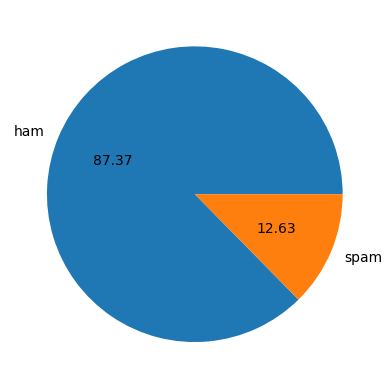

In [19]:
import matplotlib.pyplot as plt #Data visualization
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced
# !pip install nltk

In [21]:
import nltk #Natural Language Toolkit
#nltk.download('punkt')

In [22]:
df['num_characters'] = df['text'].apply(len) # Length / No. of characters in each message

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# Number of words
# df['text'].apply( lambda x : nltk.word_tokenize(x))
df['num_words'] = df['text'].apply( lambda x : len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# Number of sentence
#df['text'].apply( lambda x : nltk.sent_tokenize(x))
df['num_sentences'] = df['text'].apply( lambda x : len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
#Analysing only all messages
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#Analysing only HAM messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#Analysing only SPAM messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
# CLearly see spam messages are larger

In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

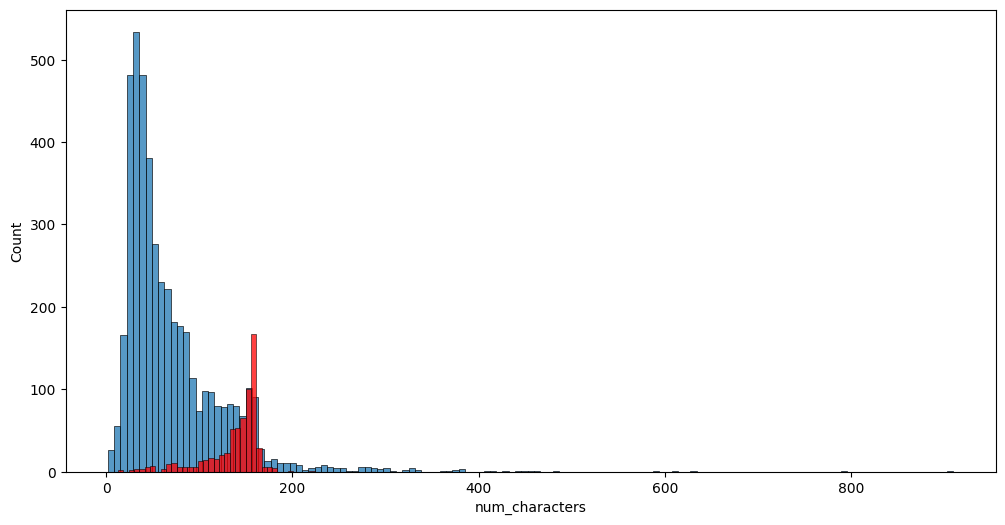

In [33]:
# Plotting number of characters in histogram of HAM and SPAM messages and see the trend
# df[df['target'] == 0]
# df[df['target'] == 0]['num_characters']
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

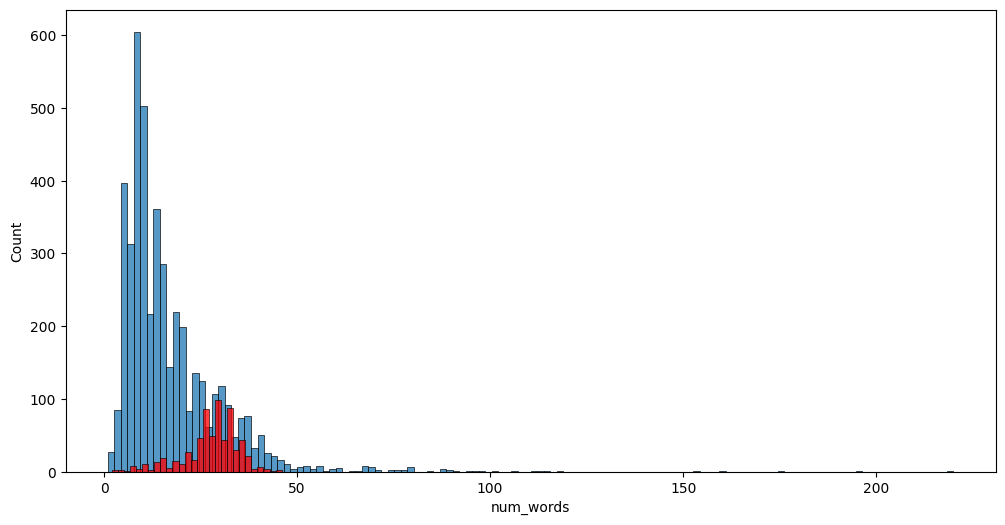

In [34]:
# Plotting number of words in histogram of HAM and SPAM messages and see the trend
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

C:\Users\Sharanya Dasgupta\pythonlab\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


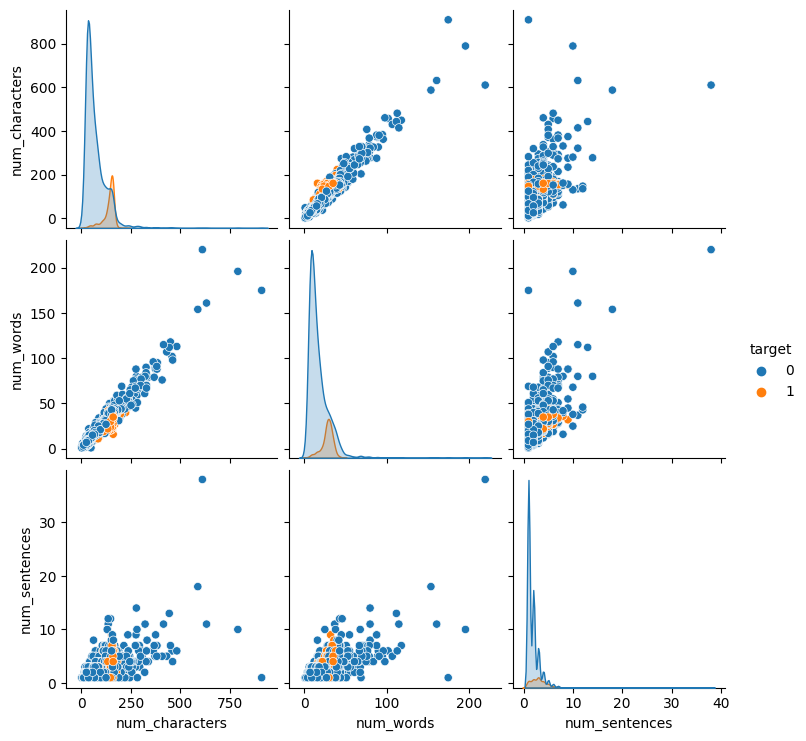

In [35]:
# Relationship among the colums
sns.pairplot(df,hue='target')

In [36]:
# Finding out Pearson Correlation Coefficient
df.corr(numeric_only=True) #Changed in version 2.0.0: The default value of numeric_only is now False.

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

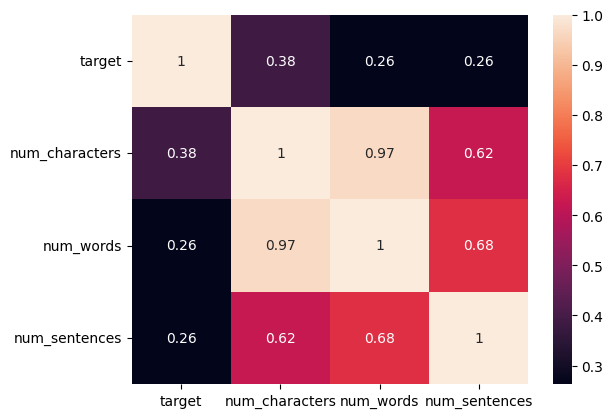

In [37]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

In [38]:
# We will keep only num_characters column as it has highest correlation with target
# Also 3 num_... cols have very strong correlation among them so we will keep only any one

## 3. Data Preprocessing
 - Lower Case 
 - Tokenization (Breaking in words)
 - Removing Special Characters
 - Removing Stop Words (that are reqd. for sentence formation only, no contribution in meaning) and punctuation
 - Stemming (Same type word like dance/dances/dancing converted to dance)

In [39]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing') # Bring the word in its root form
ps.stem('loves')

'love'

In [43]:
# Writing a function to do text processing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    
    for i in text :
        if i.isalnum():
            y.append(i)
            
    text = y[:] # Don't do :- text = y , as list is a mutable data type can't be copied directly needed to be cloned
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y) #Returns as a string
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
# To Find Out Main Words in HAM and SPAM Messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
# Only Spam Rows Taking only transformed_text cols and concatinating strings
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

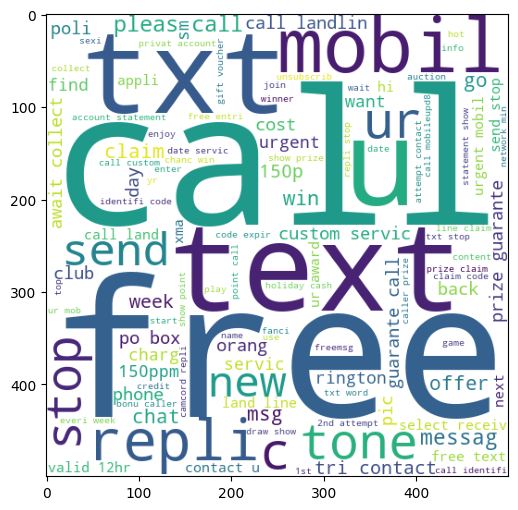

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
# Only ham Rows Taking only transformed_text cols and concatinating strings
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

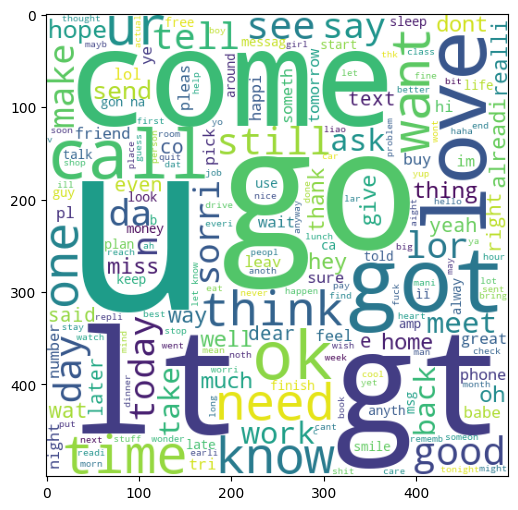

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
# Now Checking Top 30 Words in SPAM messages
spam_corpus=[]
# df[df['target']== 1]['transformed_text']
#df[df['target']== 1]['transformed_text'].tolist() # tolist() creates a list of messages 
for message in df[df['target']== 1]['transformed_text'].tolist():
    #print(message)
    for word in message.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

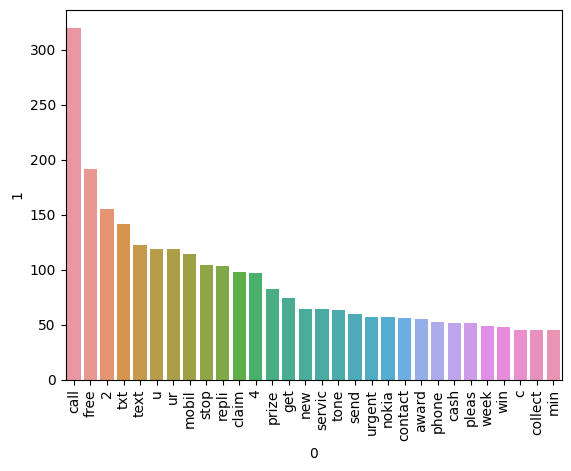

In [53]:
from collections import Counter # 'C' should be capital letter
# Counter(spam_corpus) # Creates a dictionary of no. of appearence of elements in the list
# pd.DataFrame(Counter(spam_corpus).most_common(30)) # Extract top 30 columns
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],orient="v") # Writing x= and y= is mandatory
plt.xticks(rotation='vertical') # Careful about spelling
plt.show()

In [54]:
# Now Checking Top 30 Words in HAM messages
ham_corpus=[]
# df[df['target']== 0]['transformed_text']
#df[df['target']== 0]['transformed_text'].tolist() # tolist() creates a list of messages 
for message in df[df['target']== 0]['transformed_text'].tolist():
    #print(message)
    for word in message.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

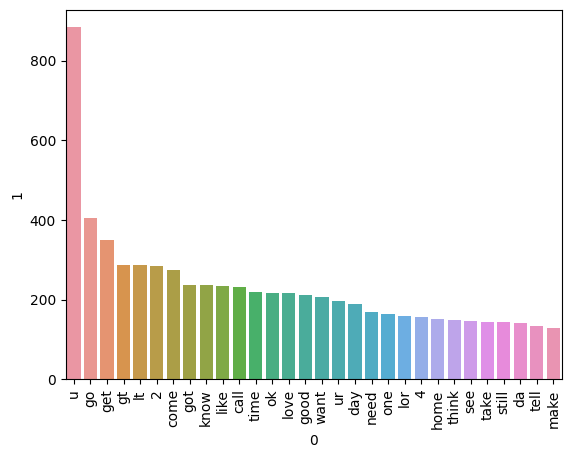

In [55]:
from collections import Counter # 'C' should be capital letter
# Counter(ham_corpus) # Creates a dictionary of no. of appearence of elements in the list
# pd.DataFrame(Counter(ham_corpus).most_common(30)) # Extract top 30 columns
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],orient="v") # Writing x= and y= is mandatory
plt.xticks(rotation='vertical') # Careful about spelling
plt.show()

In [56]:
# Words are shorten due to Semming

## 4. Model Building
- Naive Bayes

In [57]:
# Convert text in vectors by Bag of Words i.e., frequent word detect
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
#cv = CountVectorizer() # To improve precision inspite of Bag of Word let us try TFIDF
cv = CountVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()
# X

In [59]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [60]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [61]:
X.shape

(5169, 3000)

In [62]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
#mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [68]:
# Conclusion :- Very bad performance # in TFIDF also not much improvement

In [123]:
mnb = MultinomialNB()
mnb1 = mnb.fit(X_train,Y_train)
Y_pred2 = mnb1.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [70]:
# Precision score not so good # accuracy score reduced but precision score improved, No False Positive

In [71]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [72]:
# Accuracy and Precision score better, Bernoulli better #TFIDF No improvement

In [73]:
# Since precision score matter here most because the data is imbalanced accuracy score doesnt matter much So we will
# go with tfidf -> mnb

## Compairing MNB with other ML Algorithm

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
#! pip install xgboost

In [76]:
# Creating Objects of all algo
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
# Dictionary of algorithms
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'Xgb' : xgb
}

In [78]:
len(clfs)

11

In [79]:
# Creating a function to do classification on differernt model and return accuracy & prcision
def accuracy(clf):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    return accuracy_score(Y_test[:],Y_pred[:])
def precision(clf):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    return precision_score(Y_test[:],Y_pred[:])


In [80]:
'''svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'svc.fit(X_train,Y_train)\nY_pred = svc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [81]:
'''knc.fit(X_train,Y_train)
Y_pred = knc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'knc.fit(X_train,Y_train)\nY_pred = knc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [82]:
'''mnb.fit(X_train,Y_train)
Y_pred = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'mnb.fit(X_train,Y_train)\nY_pred = mnb.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [83]:
'''dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'dtc.fit(X_train,Y_train)\nY_pred = dtc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [84]:
'''lrc.fit(X_train,Y_train)
Y_pred = lrc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'lrc.fit(X_train,Y_train)\nY_pred = lrc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [85]:
'''rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'rfc.fit(X_train,Y_train)\nY_pred = rfc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [86]:
'''abc.fit(X_train,Y_train)
Y_pred = abc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'abc.fit(X_train,Y_train)\nY_pred = abc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [87]:
'''bc.fit(X_train,Y_train)
Y_pred = bc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'bc.fit(X_train,Y_train)\nY_pred = bc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [88]:
'''etc.fit(X_train,Y_train)
Y_pred = etc.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'etc.fit(X_train,Y_train)\nY_pred = etc.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [89]:
'''gbdt.fit(X_train,Y_train)
Y_pred = gbdt.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'gbdt.fit(X_train,Y_train)\nY_pred = gbdt.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [90]:
'''xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))'''

'xgb.fit(X_train,Y_train)\nY_pred = xgb.predict(X_test)\nprint(accuracy_score(Y_test,Y_pred))\nprint(precision_score(Y_test,Y_pred))'

In [91]:
#Looping on dictionary storing data in list converting to dataframe
accuracy_scores = [0.9758220502901354,0.9052224371373307,0.9709864603481625,0.9274661508704062,0.9584139264990329,0.9758220502901354,0.960348162475822,0.9584139264990329,0.9748549323017408,0.9468085106382979,0.9671179883945842]
precision_scores = [0.9747899159663865,1.0,1.0,0.8118811881188119,0.9702970297029703,0.9829059829059829,0.9292035398230089,0.8682170542635659,0.9745762711864406,0.9191919191919192,0.9333333333333333]


In [92]:
print(len(accuracy_scores),len(precision_scores),len(clfs.keys()))

11 11 11


In [93]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy' : accuracy_scores , 'Precision' : precision_scores}).sort_values(by=['Precision'],ascending=False)

In [94]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,Xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [95]:
# by accuracy ETC / SVC / RF / NB
# by Precision NB / ETC / RF / SVC
# conclusion NB

In [96]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,Xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\Sharanya Dasgupta\pythonlab\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


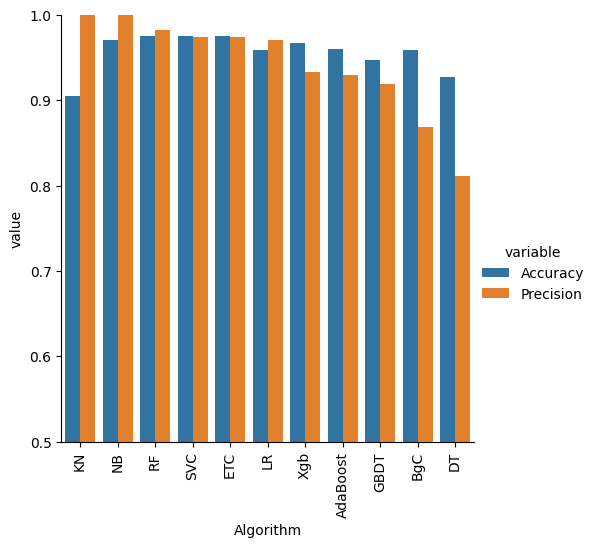

In [97]:
sns.catplot(x= 'Algorithm', y= 'value', hue='variable',data = performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# MODEL IMPROVE

In [98]:
## 1. Change the max_features parameters of TfIdf
## 2. Scaling doesnot improve result
## 3. Adding num_character col to model also doesnot improve result

In [99]:
# Voting Classifier i.e, combination of multiple algorithm, generally best performing
'''svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier'''

"svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)\nmnb = MultinomialNB()\netc = ExtraTreesClassifier(n_estimators=50,random_state=2)\n\nfrom sklearn.ensemble import VotingClassifier"

In [100]:
#voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [101]:
#voting.fit(X_train,Y_train)

In [102]:
'''Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))'''

'Y_pred = voting.predict(X_test)\nprint("Accuracy",accuracy_score(Y_test,Y_pred))\nprint("Precision",precision_score(Y_test,Y_pred))'

In [103]:
# Not much improved

In [104]:
# Applying Stacking, here weightage is given
'''estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()'''

"estimators=[('svm',svc),('nb',mnb),('et',etc)]\nfinal_estimator=RandomForestClassifier()"

In [105]:
#from sklearn.ensemble import StackingClassifier

In [106]:
#clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [107]:
#clf.fit(X_train,Y_train)

In [108]:
'''Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))'''

'Y_pred = voting.predict(X_test)\nprint("Accuracy",accuracy_score(Y_test,Y_pred))\nprint("Precision",precision_score(Y_test,Y_pred))'

In [109]:
# Not much improved # So finally using multinomialNB

# New email comes :-
## 1. Text Preprocessing
## 2. Vectorization
## 3. Apply Algorithm

In [118]:
input_sms = "Hello your presentation was so good that i cant keep calm"
transformed_sms = transform_text(input_sms)
print(transformed_sms)

hello present good cant keep calm


In [119]:
vector_input = tfidf.transform([transformed_sms])
print(vector_input)

  (0, 2027)	0.47724072141489693
  (0, 1441)	0.34599321497099145
  (0, 1237)	0.3804313378242393
  (0, 1155)	0.27189065174510535
  (0, 551)	0.36466397087955804
  (0, 540)	0.5485413822626877


In [124]:
result = mnb1.predict(vector_input)[0]

In [125]:
result

0

In [126]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb1,open('model.pkl','wb'))